# Baby Name Timeline

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [2]:
path = '../code_review3/data'

## Task 1

Calculate for each name in yob2000.txt its percentage of total births. Store this percentage as an additional column.

In [3]:
df = pd.read_csv(os.path.join(path, 'yob2000.txt'), names=['name', 'gender', 'count'])

df['percentage'] = df['count'] * 100 / df['count'].sum()
df.head()

,name,gender,count,percentage
0,Emily,F,25957,0.686806
1,Hannah,F,23085,0.610814
2,Madison,F,19968,0.528341
3,Ashley,F,17997,0.476189
4,Sarah,F,17708,0.468542


## Task 2
Read all files yob1880.txt, yob1881.txt ... yob2021.txt. Add an extra column for the year. Concatenate them into a single data structure.

In [4]:
data = []
for year in range(1880, 2022):
    df = pd.read_csv(os.path.join(path, f'yob{year}.txt'), names=['name', 'gender', 'count'])
    df['year'] = year
    data.append(df)
    
df = pd.concat(data, axis=0, ignore_index=True)
df.shape

(2052781, 4)

## Task 3

Calculate the total number of births for each year. Visualize the timeline as a line plot.

<AxesSubplot:xlabel='year'>

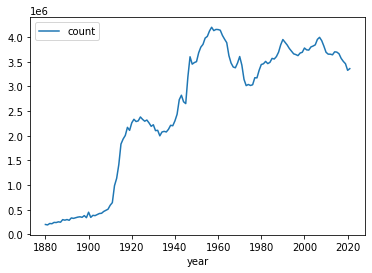

In [5]:
df.groupby('year').sum().plot()

## Task 4

Now, create a timeline for your own name. First check if your name occurs at all. If yes, create a table with the columns year and number.

You may want to sum up the binary genders or choose one. With few exceptions, the influence on the result is tiny.

If your name is not very frequent, there might be missing data for some years. Insert missing data with a 0.

Draw a line plot and label the axes.

In [6]:
all_years = list(range(1880, 2022))
zeros = [0 for _ in all_years]
empty = pd.Series(zeros, index=all_years, name='count')
empty.head(3)

1880    0
1881    0
1882    0
Name: count, dtype: int64

<AxesSubplot:>

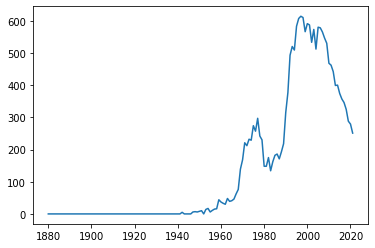

In [7]:
kristian = df[(df['name'] == 'Kristian') & (df['gender']=='M')]
kristian.set_index('year', inplace=True)
kristian = kristian['count'] + empty # necessary if you want to extend to the beginning
kristian.fillna(0.0, inplace=True)
kristian.plot()

## Task 5
Investigate the popularity of the names of some US celebrities over the last 130 years. Plot a time line with 2-4 names.

<AxesSubplot:xlabel='year', ylabel='count'>

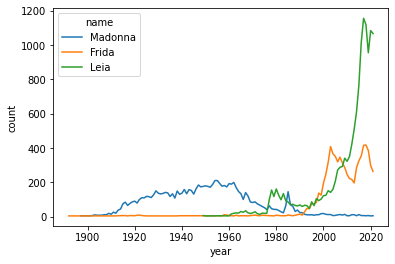

In [8]:
girls = df[df['gender'] == 'F'].set_index('name')

celebrities = girls.loc[['Madonna', 'Frida', 'Leia']]

sns.lineplot(data=celebrities, x='year', y='count', hue='name')

## Task 6

Finally, we will normalize the data. Repeat Task 4 or 5, but divide the count of a given name by the total number of births of that year.

How does the result change and why is this important?

In [9]:
year_total = df.groupby('year')['count'].sum()
year_total.head(3)

year
1880    201484
1881    192690
1882    221533
Name: count, dtype: int64

In [10]:
normalized = kristian / year_total
normalized.tail(3)

2019    0.000083
2020    0.000084
2021    0.000075
Name: count, dtype: float64

<AxesSubplot:>

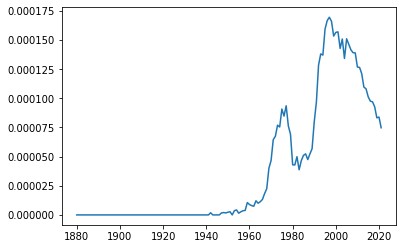

In [11]:
normalized.plot()

<AxesSubplot:>

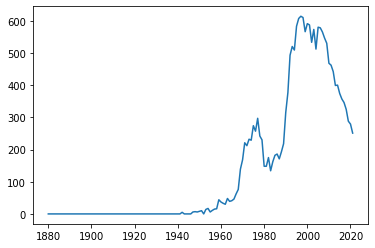

In [12]:
kristian.plot()

### Double-Check
The normalization looks suspiciously similar. Let's check a more popular name.

In [13]:
mary = df[(df['name'] == 'Mary') & (df['gender']=='F')]
mary = mary.set_index('year')['count']
mary.head()

year
1880    7065
1881    6919
1882    8148
1883    8012
1884    9217
Name: count, dtype: int64

<AxesSubplot:title={'center':'Number of Marys after normalization'}, xlabel='year'>

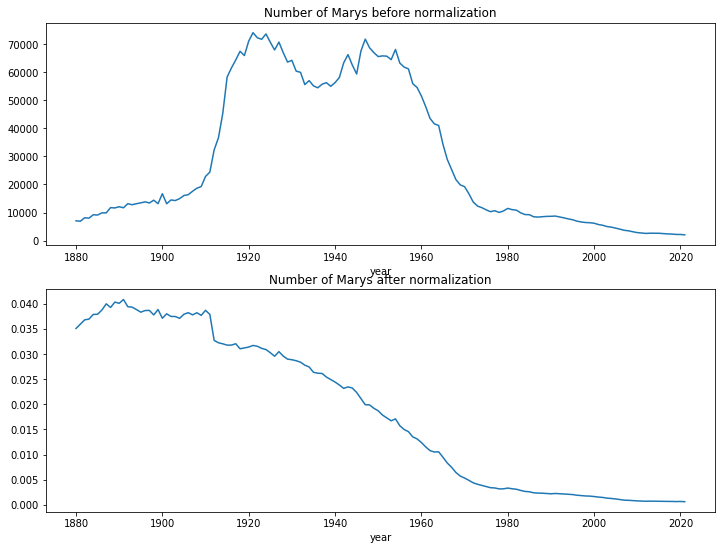

In [14]:
plt.figure(figsize=(12, 9))

plt.subplot(2, 1, 1)
plt.title('Number of Marys before normalization')
mary.plot()

plt.subplot(2, 1, 2)
plt.title('Number of Marys after normalization')
(mary / year_total).plot()